# Group 3 Problem Set C

# Question

You are a data visualization expert working for the technology transfer of a prestigious global university. 

This week, you are supposed to support one of the scholars working for the university. Specifically, Prof. D.Deming just published an academic article at a major scholarly journal dealing with labour economics subjects; it is now time to communicate the result of this work to a broader audience comprising policy makers, journalists, human resource managers. The overall goal is to attract the attention of a) stakeholders interested in applying the insights of the paper; b) economic journalists focusing on labour economics.

You and Prof. Deming agree it would be great to start informally circulating some visual exhibits (by means of email messages to contacts)  that summarize one key insight of the paper: "the relationship between cognitive skills and wage depends on individuals' social skills, such that the higher the social skills the larger the contribution of cognitive skills to wage". 

Steps:

1. read sections I, III, IV and V of the paper (enclosed)
2. go back to the dataset (enclosed) behind the paper and appreciate the meaning of the most relevant variables
3. create no more than three visualizations that convey the key result of the paper―note that one, glorious visualization may be enough
4. add a very simple description to the visualization; ideally, it should be a stand-alone note to put at the bottom of the chart(s).

# Set-up the data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets

In [51]:
# import onet98 dataset
onet98 = pd.io.stata.read_stata('onet1998.dta')
onet98.head().T

,0,1,2,3,4
onet98code,13002A,13002B,13005A,13005B,13005C
require_social_onet1998,6.38333,6.66667,8,8,7.66667
w21ij00m,3.32,5.32,4,4,5.2
number_facility_onet1998,8.62069,8.89655,6.55172,6.2069,4.48276
math_onet1998,7.94075,7.23156,6.04236,4.60324,5.38221
routine_onet1998,5.68598,4.29878,2.19512,2.2439,2.17988
socskills_onet1998,7.18314,7.71049,7.63922,5.00316,6.54631
service_onet1998,2.23914,4.15006,2.75543,3.41315,3.59515
customer_onet1998,3.32,5.32,4,4,5.2
reason_onet1998,8.94018,8.30722,7.58396,6.94598,6.30082


In [52]:
#import NLSY97 Dataset
nlsy97 = pd.io.stata.read_stata('nlsy97_clean.dta')
nlsy97.head().T

,0,1,2,3,4
pubid,1,1,1,1,1
year,1997,1998,1999,2000,2001
ind,119,119,868,868,868
occ,476,476,999,411,411
race,3,3,3,3,3
sex,2,2,2,2,2
age,16,17,18,19,20
urban,1,1,1,1,1
div,1,1,1,1,1
metro,3,3,3,3,3


In [53]:
#import NLSY79 Dataset
nlsy79 = pd.io.stata.read_stata('nlsy79_clean.dta')
nlsy79.head().T

,0,1,2,3,4
caseid,1,1,1,1,1
year,1979,1980,1981,1982,1983
ind,717,NaN,717,NaN,NaN
emp,1,NaN,1,NaN,NaN
race,3,3,3,3,3
sex,2,2,2,2,2
age,20,21,22,23,24
urban,1,NaN,1,NaN,NaN
div,1,NaN,1,NaN,NaN
metro,1,NaN,1,NaN,NaN


In [6]:
# import datat from NLSY79 and NLSY97 merged
NLSY_merged = pd.io.stata.read_stata('nlsy_merged.dta')

In [7]:
data1980 = pd.read_stata('1980.dta')
data1990 = pd.read_stata('1990.dta')
data2000 = pd.read_stata('2000.dta')
data2006 = pd.read_stata('2006.dta')
data2009 = pd.read_stata('2009.dta')
data2012 = pd.read_stata('2012.dta')

# Combine the data

In [55]:
data1980_2012 = pd.concat([data1980, data1990, data2000, data2006, data2009, data2012]) #Combining the 6 dataframe.
data1980_2012.head().T

,0,1,2,3,4
year,1980,1980,1980,1980,1980
sex,Female,Female,Male,Male,Male
occ,43,734,79,9,27
occ1990,Architects,"Printing machine operators, n.e.c.",Foresters and conservation scientists,"Purchasing managers, agents and buyers, n.e.c.","Personnel, HR, training, and labor relations s..."
ind,10,10,10,10,10
ind1990,"Agricultural production, crops","Agricultural production, crops","Agricultural production, crops","Agricultural production, crops","Agricultural production, crops"
edu_bin,Some college,High school graduate,College graduate,Some college,College graduate
lswt,21.9429,23.7714,73.3714,46.8114,79.3143
hrwage,12.5041,13.4202,19.5669,33.3833,19.0858
ln_hrwage,2.52606,2.59676,2.90836,3.47093,2.87232


In [56]:
data = data1980_2012[['year', 'occ', 'occ1990','hrwage','ln_hrwage', 'require_social_onet1998', 'math_onet1998', 'socskills_onet1998']]
data.T

,0,1,2,3,4,5,6,7,8,9,...,330323,330324,330325,330326,330327,330328,330329,330330,330331,330332
year,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,...,2011,2012,2012,2012,2011,2012,2011,2012,2012,2013
occ,43,734,79,9,27,166,199,199,547,806,...,650,5520,5140,3255,4250,9510,430,7750,1860,3955
occ1990,Architects,"Printing machine operators, n.e.c.",Foresters and conservation scientists,"Purchasing managers, agents and buyers, n.e.c.","Personnel, HR, training, and labor relations s...","Economists, market researchers, and survey res...","Athletes, sports instructors, and officials","Athletes, sports instructors, and officials","Mechanics and repairers, n.e.c.","Truck, delivery, and tractor drivers",...,"Personnel, HR, training, and labor relations s...",Dispatchers,Payroll and timekeeping clerks,Registered nurses,Gardeners and groundskeepers,"Crane, derrick, winch, and hoist operators","Managers and administrators, n.e.c.",Assemblers of electrical equipment,"Social scientists, n.e.c.","Protective services, n.e.c."
hrwage,12.5041,13.4202,19.5669,33.3833,19.0858,47.5271,9.77198,4.12598,14.8274,10.92,...,20.8667,10.0863,29.127,36.1021,17.546,36.1716,47.8624,16.4063,55.3276,17.5537
ln_hrwage,2.52606,2.59676,2.90836,3.47093,2.87232,3.71069,2.27952,1.4173,2.65603,2.33223,...,2.9539,2.31118,3.36355,3.53329,2.82965,3.57852,3.77538,2.73477,3.28982,2.76537
require_social_onet1998,5.43478,1.29791,5.09565,8,8.31304,5.56522,7.25466,7.25466,2.05145,5.08986,...,8.31304,7.65217,1.3913,9.26957,2.08696,4.26087,7.6114,0.991425,5.04348,7.42029
math_onet1998,6.66722,2.23572,5.29351,5.97952,4.28072,7.51694,2.48947,2.48947,2.83328,3.04427,...,4.28072,2.17164,5.52817,4.5938,2.23765,2.11782,5.06311,2.99044,5.25919,2.55955
socskills_onet1998,6.41256,0.62058,4.06453,6.74227,6.32537,6.50264,3.31263,3.31263,1.20332,2.72039,...,6.32537,3.43756,0.961079,5.73781,1.8251,1.90252,6.82376,0.723514,4.11523,5.05388


# Clean the dataset

## Clean the first dataset

In [57]:
# We calculate the average of social skill in Onet 1998
socskills = data.groupby('year', as_index = False)['socskills_onet1998']
socskills_mean = socskills.aggregate(np.mean)
socskills_mean

,year,socskills_onet1998
0,1980,2.871417
1,1990,2.925236
2,2000,3.414372
3,2005,3.568173
4,2006,3.587652
5,2007,3.595216
6,2008,3.601443
7,2009,3.615934
8,2010,3.657200
9,2011,3.623115


In [58]:
# We calculate the average of math skill in Onet 1998
math = data.groupby('year', as_index = False)['math_onet1998']
math_mean = math.aggregate(np.mean)
math_mean

,year,math_onet1998
0,1980,3.995087
1,1990,4.014987
2,2000,4.184520
3,2005,4.275370
4,2006,4.277299
5,2007,4.285656
6,2008,4.294716
7,2009,4.295975
8,2010,4.300809
9,2011,4.287291


In [59]:
# calculte the quartile of social skills intensity
a = data['socskills_onet1998']
a.quartile([.25, .5, .75])

0.25    1.277207
0.50    2.855799
0.75    5.448250
Name: socskills_onet1998, dtype: float64

In [60]:
# We define the upper social skill intensity with the upper 25% of the social skill dataset.
wage = data[['year', 'socskills_onet1998', 'hrwage']]
thirquartile = wage[wage.socskills_onet1998 > 5.44825]
thirquartile

,year,socskills_onet1998,hrwage
0,1980,6.412563,12.504141
3,1980,6.742272,33.383278
4,1980,6.325371,19.085772
5,1980,6.502635,47.527088
10,1980,5.707675,15.206395
18,1980,8.146935,22.539980
26,1980,6.193482,19.070961
34,1980,7.258842,16.581684
35,1980,5.448250,17.306017
36,1980,8.146935,13.884423


In [61]:
# We define the low social skill intensity with the lower 25% of the social skill dataset.
fstquartile = wage[wage.socskills_onet1998 < 1.277207]
fstquartile

,year,socskills_onet1998,hrwage
1,1980,0.620580,13.420169
8,1980,1.203318,14.827351
11,1980,1.187486,18.362526
12,1980,1.071149,7.987420
17,1980,0.240741,15.699804
23,1980,0.235340,11.151983
24,1980,0.235340,14.484993
28,1980,0.043248,11.973061
31,1980,0.544796,12.462276
37,1980,0.551585,5.816226


In [62]:
# The average wage of high social skill intensity level 
thirquartile1 = thirquartile.groupby('year', as_index = False)['hrwage']
thirquartile1_mean = thirquartile1.aggregate(np.mean)
thirquartile1_mean

,year,hrwage
0,1980,24.992601
1,1990,27.903099
2,2000,31.181942
3,2005,35.577618
4,2006,34.416176
5,2007,35.405144
6,2008,33.910313
7,2009,35.577415
8,2010,33.994041
9,2011,32.852516


In [63]:
# The average wage of low social skill intensity level 
fstquartile1 = data.groupby('year', as_index = False)['hrwage']
fstquartile1_mean = fstquartile1.aggregate(np.mean)
fstquartile1_mean

,year,hrwage
0,1980,20.206692
1,1990,21.498234
2,2000,24.989122
3,2005,26.222616
4,2006,25.858572
5,2007,27.155590
6,2008,25.280609
7,2009,26.009584
8,2010,25.458645
9,2011,24.389938


## Clean the second dataset

In [64]:
NLSY_merged.loc[:,'av_soc_std'] = Social_EMP[['soc_nlsy2_std', 'soc_nlsy_std']].mean(axis=1)

In [65]:
Social_EMP = NLSY_merged[['pubid','year','occ1990dd','emp','afqt_std', 'soc_nlsy2_std','soc_nlsy_std','av_soc_std']]

In [66]:
# remove 'NA' entries
Social_EMP = Social_EMP.dropna()

In [67]:
# Find the range and axis for quadrant plot
x_mean = Social_EMP['av_soc_std'].mean()
x_max = Social_EMP['av_soc_std'].max()
x_min = Social_EMP['av_soc_std'].min()
y_mean = Social_EMP['afqt_std'].mean()
y_max = Social_EMP['afqt_std'].max()
y_min = Social_EMP['afqt_std'].min()

In [68]:
# Prepare Data
x = Social_EMP['av_soc_std']
y = Social_EMP['afqt_std']
# Mark each entry with quadrant number
Social_EMP.loc[(Social_EMP.afqt_std>=y_mean) & (Social_EMP.av_soc_std>=x_mean), 'quadrant'] = 1
Social_EMP.loc[(Social_EMP.afqt_std>=y_mean) & (Social_EMP.av_soc_std< x_mean), 'quadrant'] = 2
Social_EMP.loc[(Social_EMP.afqt_std<y_mean) & (Social_EMP.av_soc_std<x_mean), 'quadrant'] = 3
Social_EMP.loc[(Social_EMP.afqt_std<y_mean) & (Social_EMP.av_soc_std>=x_mean), 'quadrant'] = 4
# Group entries by quadrant
EMP = Social_EMP.groupby('quadrant', as_index=False).aggregate({"emp":[np.sum],"av_soc_std":[np.mean],"afqt_std":[np.mean]})

# Plot the graph

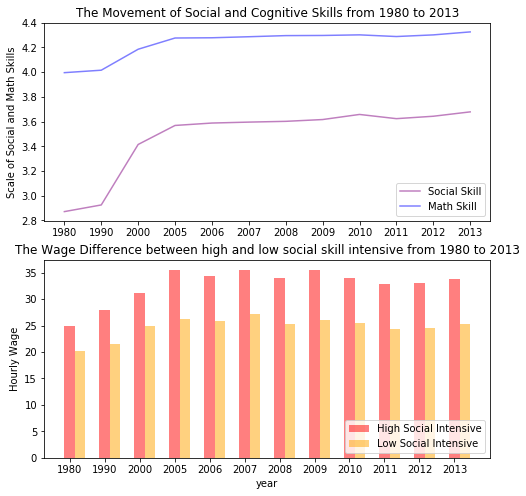

In [69]:
fig = plt.figure(figsize = (8, 8))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.arange(12)
year = ('1980', '1990', '2000', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013')
ax1.plot(socskills_mean['year'], socskills_mean['socskills_onet1998'], c = 'purple', alpha=0.5, label='Social Skill')
ax1.plot(math_mean['year'], math_mean['math_onet1998'], c = 'blue', alpha=0.5, label='Math Skill')
ax2.bar(x, thirquantile1_mean['hrwage'], color = 'red', alpha=0.5, width = 0.3, label='High Social Intensive')
ax2.bar(x + 0.3, fstquantile1_mean['hrwage'], color = 'orange', alpha=0.5, width = 0.3, label='Low Social Intensive')

ax1.set_title('The Movement of Social and Cognitive Skills from 1980 to 2013')
ax2.set_title('The Wage Difference between high and low social skill intensive from 1980 to 2013')
ax2.set_xlabel('year')
ax1.set_ylabel('Scale of Social and Math Skills')
ax2.set_ylabel('Hourly Wage')
ax2.legend(loc='lower right')
ax1.legend(loc='lower right')

plt.xticks(x,year)
plt.show()

---
Feedback:

- <span class="burk">this is interesting but it doesn't address the problem ― why didn't you consider the cognitive skills variable?</span> 

In the top graph, we observed a sharp increase in the individual's social skill from year 1980 to 2000 and a reamain constant to 2013. 

Next, in the bottem graph, we can see that the difference of wage level between High social intensive (Red Colour) occupation and Low social intensive (Orange Colour) has also increased, especially from year 1980 to 2000.

Overall, as the individual's social skill level increases, it also increase the hourly wage rate for high social intensive job. 

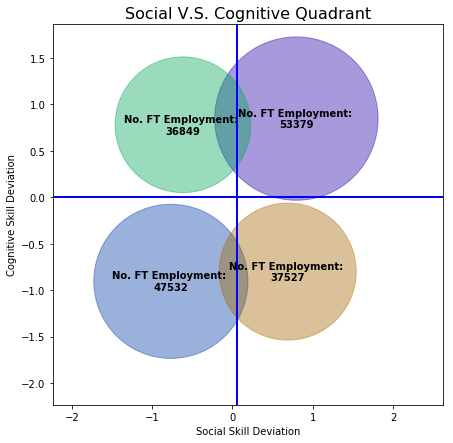

In [70]:
# Figure framework
fig = plt.figure(figsize=(7,7))
colors = ['#2300A8', '#00A658','#003ca6','#a66600']
labels = {'No. FT Employment: \n53379': (0.796,0.846),
          'No. FT Employment: \n36849': (-0.616,0.779),
          'No. FT Employment: \n47532': (-0.767,-0.905),
          'No. FT Employment: \n37527': (0.688,-0.800)}
# Data to plot
x = EMP['av_soc_std']
y = EMP['afqt_std']
# set a proportion that is visible on the quadrant plot
z = EMP['emp'] / 2
# Populate the figure
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y, s = z, c=colors, alpha=0.4)  

# Set x-axis range
plt.xlim((x_min,x_max))
# Set y-axis range
plt.ylim((y_min,y_max))

# Draw lines to split quadrants
ax.plot([x_mean,x_mean],[y_min,y_max], linewidth=2, color='blue' )
ax.plot([x_min,x_max],[y_mean,y_mean], linewidth=2, color='blue' )
plt.title('Social V.S. Cognitive Quadrant', fontsize = 16)
ax.set_xlabel('Social Skill Deviation', fontsize = 10)
ax.set_ylabel('Cognitive Skill Deviation', fontsize = 10)

# Label the plot
for label in labels:
    plt.annotate(label, 
                labels[label],
                horizontalalignment='center',
                verticalalignment='center',
                size=10, weight='bold')
plt.show()
plt.close()

---
Feedback:
    
- <span class="girk">This is remarkably good! Well done!!</span>

The objective of this scattered plot in a quadrant plot is to visualise the impact of social skills on the number of full time employments. The quadrant is constructed in such a way that it mimics 4 categories of occupations: Quadrant I: 'High Cognitive, High Social' Quadrant II: 'High Cognitive, Low Social' Quadrant III: 'Low Cognitive, Low Social' Quadrant IV: 'Low Cognitive, Hig Social'

**The number of full-time employment in the first quadrant is much higher than that in other quadrants. Particularly, the number of full-time employment increasse significantly compare to the 'high cognitive, low social'quadrant, indicating the fact that the higher the social skills the higher the return of cognitive skills.**

We also observe that the volume in the 3rd quadrant is not the lowest, though it's 10,000 less than what the first quadrant shows. This could be due to the 'NA' entries removed while preparing the data, as it affects the mean calculation. There are about 30,000 entries with NA value in 'afqt_std' column.